In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
city_and_ride_df = pd.merge(city_data_df, ride_data_df, on = 'city', how="outer")

# Display the data table for preview
city_and_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [4]:
urban = city_and_ride_df.loc[city_and_ride_df["type"] == "Urban"]
suburban = city_and_ride_df[city_and_ride_df["type"] == "Suburban"]
rural = city_and_ride_df[city_and_ride_df["type"] == "Rural"]

In [5]:
average_fare = city_and_ride_df.groupby("city")["fare"].mean()
total_rides = city_and_ride_df.groupby("city")["ride_id"].count()
total_drivers = city_and_ride_df.groupby("city")["driver_count"].mean()
city_type = city_data_df.set_index('city')["type"]

In [6]:
plot_df  = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type})
plot_df.head()

,Average Fare per City,Number of Rides,Number of Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


In [7]:
avgfare_urban=urban.groupby(['city'])['fare'].mean()
totalrides_urban=urban.groupby(['city'])['ride_id'].count()
totaldrivers_urban=urban.groupby(['city'])['driver_count'].value_counts()

avgfare_suburban=suburban.groupby(['city'])['fare'].mean()
totalrides_suburban=suburban.groupby(['city'])['ride_id'].count()
totaldrivers_suburban=suburban.groupby(['city'])['driver_count'].value_counts()

avgfare_rural=rural.groupby(['city'])['fare'].mean()
totalrides_rural=rural.groupby(['city'])['ride_id'].count()
totaldrivers_rural=rural.groupby(['city'])['driver_count'].value_counts()

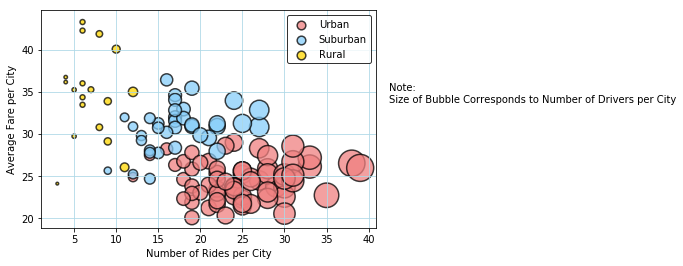

In [51]:
plt.scatter(totalrides_urban, avgfare_urban,s=totaldrivers_urban**1.8,
            marker ='o', facecolors ="lightcoral",linewidths=1.5, edgecolors='black',alpha = 0.75, label="Urban")

plt.scatter(totalrides_suburban, avgfare_suburban,s=totaldrivers_suburban**1.8,
            marker ='o', facecolors ="lightskyblue",linewidths=1.5, edgecolors='black',alpha = 0.75, label="Suburban")

plt.scatter(totalrides_rural, avgfare_rural,s=totaldrivers_rural**1.8,
            marker ='o', facecolors ="gold",linewidths=1.5, edgecolors='black',alpha = 0.75, label="Rural")


plt.title("")
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')
plt.grid(color = "lightblue")
plt.gcf().text(0.93, 0.6, 'Note:', fontsize=10)
plt.gcf().text(0.93, 0.56, 'Size of Bubble Corresponds to Number of Drivers per City', fontsize=10)
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

## Total Fares by City Type

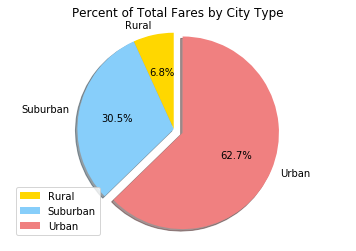

In [9]:
total_fare_pie = city_and_ride_df.groupby(["type"])["fare"].sum()
total_fare_pie.index
plt.pie(total_fare_pie, labels = total_fare_pie.index, autopct = "%1.1f%%", colors = ["gold", "lightskyblue", "lightcoral"], explode = (0,0,.1), shadow = True, startangle = 90)

plt.axis("equal")
plt.title("Percent of Total Fares by City Type")
plt.legend(loc = "lower left")

plt.show()

## Total Rides by City Type

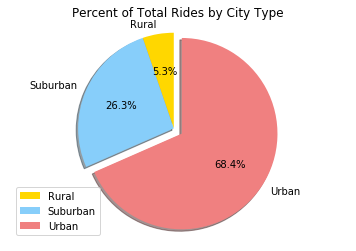

In [10]:
total_rides_pie = city_and_ride_df.groupby(["type"])["ride_id"].count()
total_rides_pie.index
plt.pie(total_rides_pie, labels = total_rides_pie.index, autopct = "%1.1f%%", colors = ["gold", "lightskyblue", "lightcoral"], explode = (0,0, 0.1), shadow = True, startangle = 90)

plt.axis("equal")
plt.title("Percent of Total Rides by City Type")
plt.legend(loc = "lower left")

plt.show()

## Total Drivers by City Type

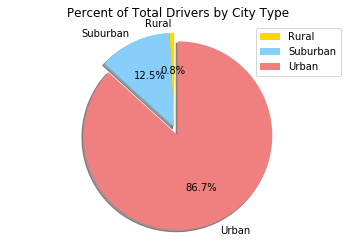

In [11]:
total_drivers_pie = city_and_ride_df.groupby(["type"])["driver_count"].sum()
total_drivers_pie.index
plt.pie(total_drivers_pie, labels = total_drivers_pie.index, autopct = "%1.1f%%", colors = ["gold", "lightskyblue", "lightcoral"], explode = (0,0, 0.1), shadow = True, startangle = 90)

plt.axis("equal")
plt.title("Percent of Total Drivers by City Type")
plt.legend(loc = "upper right")

plt.show()